In [1]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

# Problem 1

In [2]:
def get_seq_1_and_seq_2(N):
    n = np.arange(N+1)
    seq_1 = 2*n + 1
    seq_2 = (n[:-1] + 1)**2
    return seq_1, seq_2

def compute_continuous_fraction(seq_1, seq_2):
    # sorry, do not like recursion, just a loop
    denom = seq_1[-1]
    for s1, s2 in zip(seq_1[:-1][::-1], seq_2[::-1]):
        denom = s1 + s2 / denom
    return denom

def approximate_pi(N):
    seq_1, seq_2 = get_seq_1_and_seq_2(N)
    denom = compute_continuous_fraction(seq_1, seq_2)
    return 4 / denom

In [3]:
N_max = 100
results = []
Ns = np.arange(N_max)
for n in Ns:
    results.append(approximate_pi(n))

results = np.array(results)
deltas = np.abs(results[1:] - results[:-1])
print("differences between successive approximations", deltas)

N_stop = Ns[1:][deltas <= 1e-16][0]
print("N to stop", N_stop)

numerically_exact_pi = approximate_pi(N_stop)
print("pi from numpy", np.pi)
print("our numerically exact pi", numerically_exact_pi)

differences between successive approximations [1.00000000e+00 1.66666667e-01 2.94117647e-02 5.08744038e-03
 8.78927708e-04 1.51492198e-04 2.60817402e-05 4.48678780e-06
 7.71433388e-07 1.32583794e-07 2.27800889e-08 3.91312094e-09
 6.72070843e-10 1.15410792e-10 1.98170369e-11 3.40261153e-12
 5.84421400e-13 1.00364161e-13 1.68753900e-14 2.66453526e-15
 4.44089210e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.000000

(0.6989700043360189, 0.8195439355418687, 0.7670433691298864)

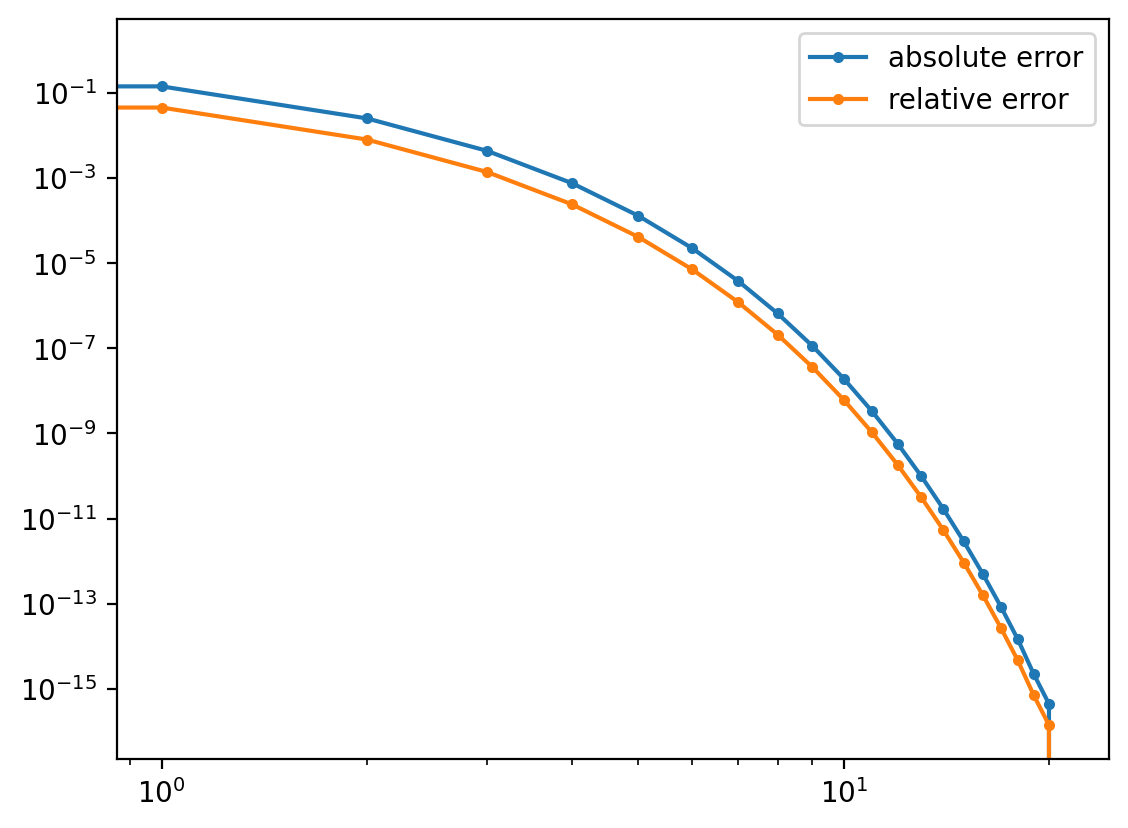

In [4]:
plt.yscale("log")
plt.xscale("log")
plt.plot(Ns[:N_stop], np.abs(results[:N_stop] - numerically_exact_pi), ".-", label="absolute error")
plt.plot(Ns[:N_stop], np.abs(results[:N_stop] - numerically_exact_pi) / np.abs(numerically_exact_pi), ".-", label="relative error")
plt.legend();

error = np.abs(results[:N_stop] - numerically_exact_pi)

# linear convergence (ish)
(np.log10(error[-3]/error[-2])).item(), (np.log10(error[-4]/error[-3])).item(), (np.log10(error[-5]/error[-4])).item()

(0.6989700043360189, 0.8195439355418687, 0.7670433691298864)

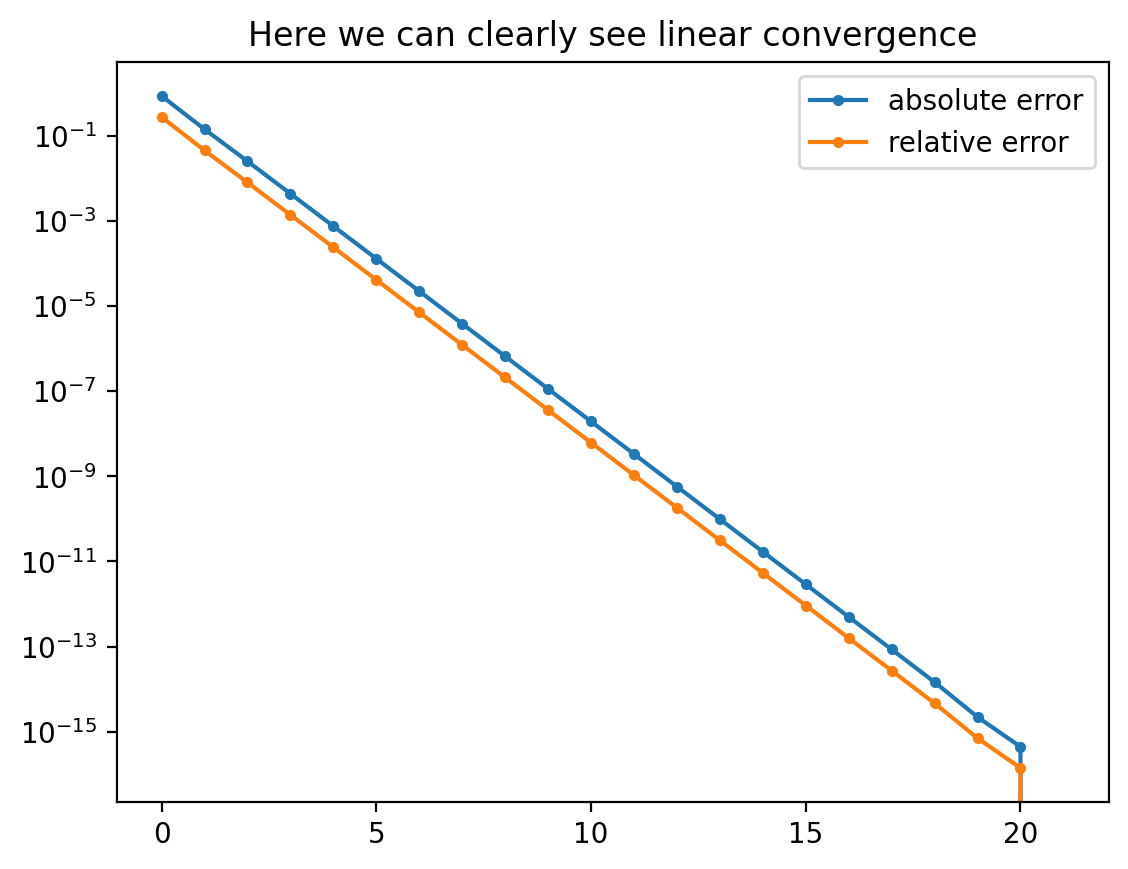

In [ ]:
plt.yscale("log")
plt.plot(Ns[:N_stop], np.abs(results[:N_stop] - numerically_exact_pi), ".-", label="absolute error")
plt.plot(Ns[:N_stop], np.abs(results[:N_stop] - numerically_exact_pi) / np.abs(numerically_exact_pi), ".-", label="relative error")
plt.legend()
plt.title("Here we can clearly see linear convergence")

error = np.abs(results[:N_stop] - numerically_exact_pi)

(np.log10(error[-3]/error[-2])).item(), (np.log10(error[-4]/error[-3])).item(), (np.log10(error[-5]/error[-4])).item()

This holds only for large $n$ = asymptotically

linear convergence $\frac{e_{n+1}}{e_{n}} = q<1$

quadratic convergence $\frac{e_{n+1}}{\left(e_{n}\right)^{2}} = q<1$

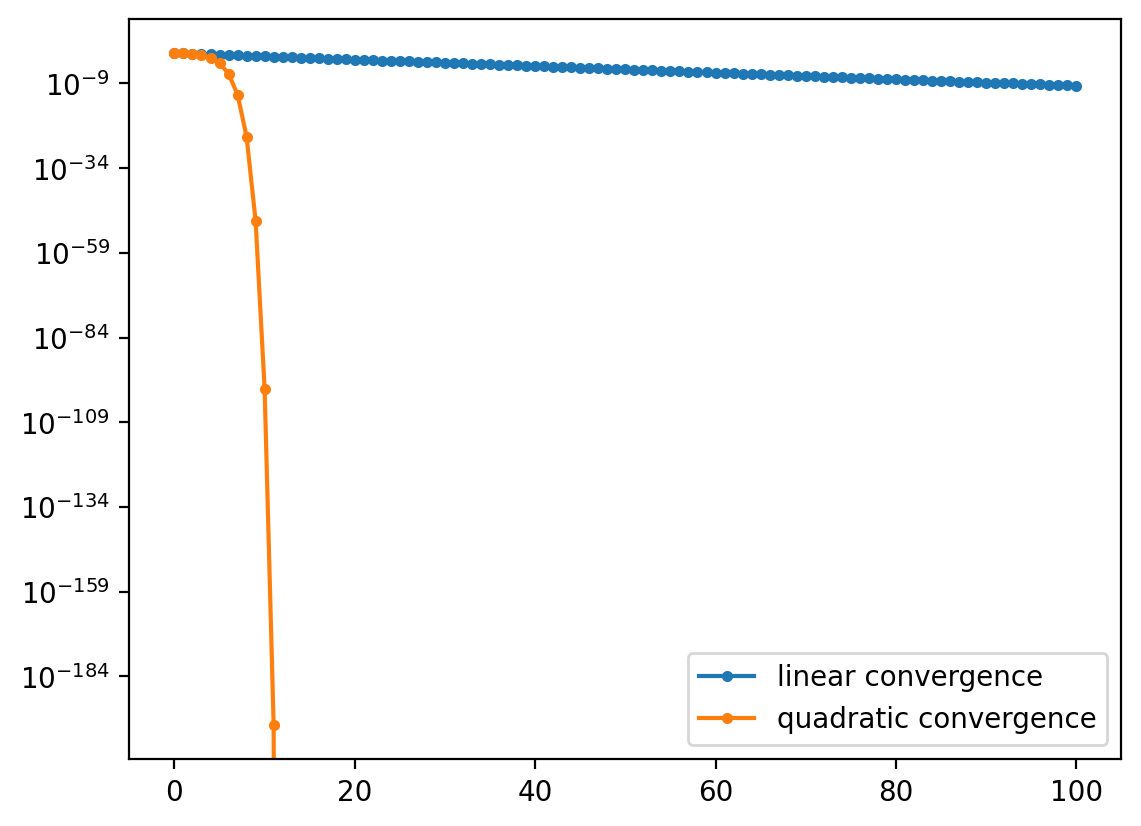

In [ ]:
q = 0.8
e0 = 1.0

E_linear = [e0,]
E_quadratic = [e0,]
for i in range(100):
    E_linear.append(E_linear[-1]*q)
    E_quadratic.append(q*E_quadratic[-1]**2)

plt.yscale("log")
plt.plot(E_linear, ".-", label="linear convergence")
plt.plot(E_quadratic, ".-", label="quadratic convergence")
plt.legend();

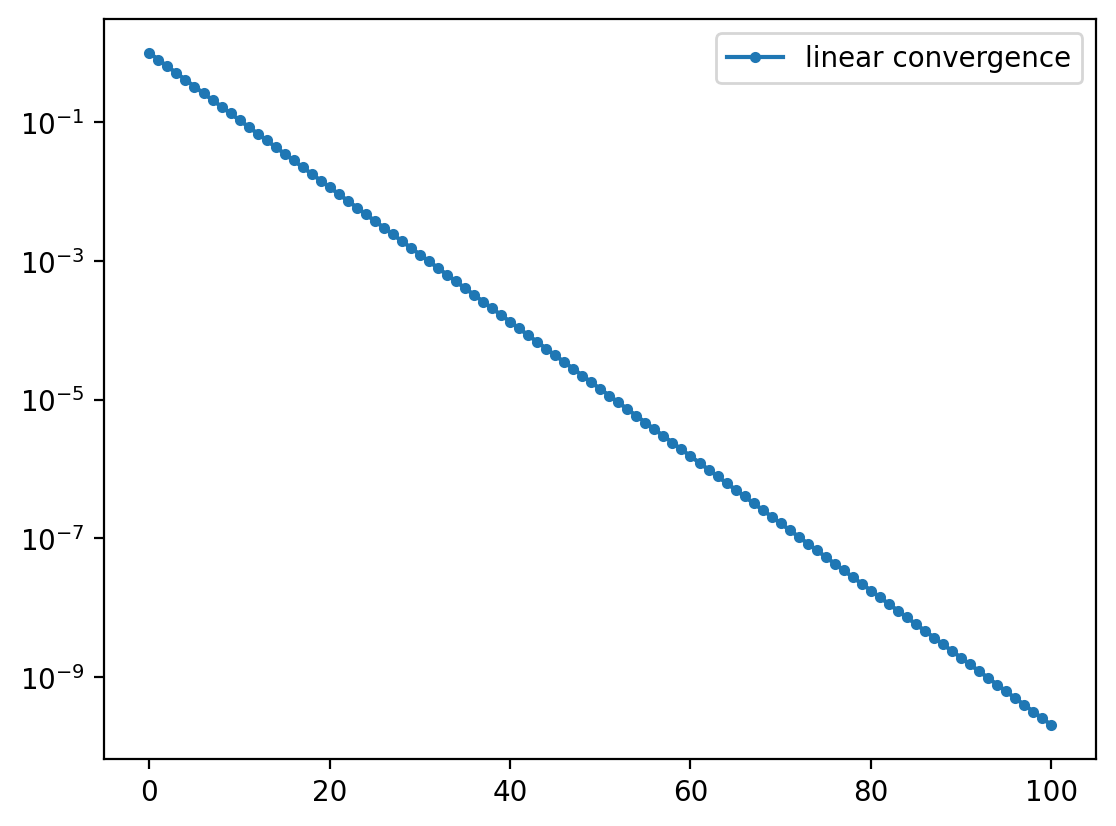

In [ ]:
plt.yscale("log")
plt.plot(E_linear, ".-", label="linear convergence")
plt.legend();

# Problem 5

In [5]:
def bisection(interval, f, N_iterations, verbose=False):
    a, b = interval
    if f(a) * f(b) > 0 :
        print("bad starting points, try again")
        return interval

    residuals = [np.abs(min(f(a), f(b))), ]
    for iteration in range(N_iterations):
        midpoint = (a + b) / 2
        if f(midpoint) * f(b) < 0:
            a = midpoint
        else:
            b = midpoint
        residuals.append(np.abs(min(f(a), f(b))))
        if verbose:
            print(f"iteration {iteration+1}, residual {residuals[-1]}, root {a}")
    return [a, b]

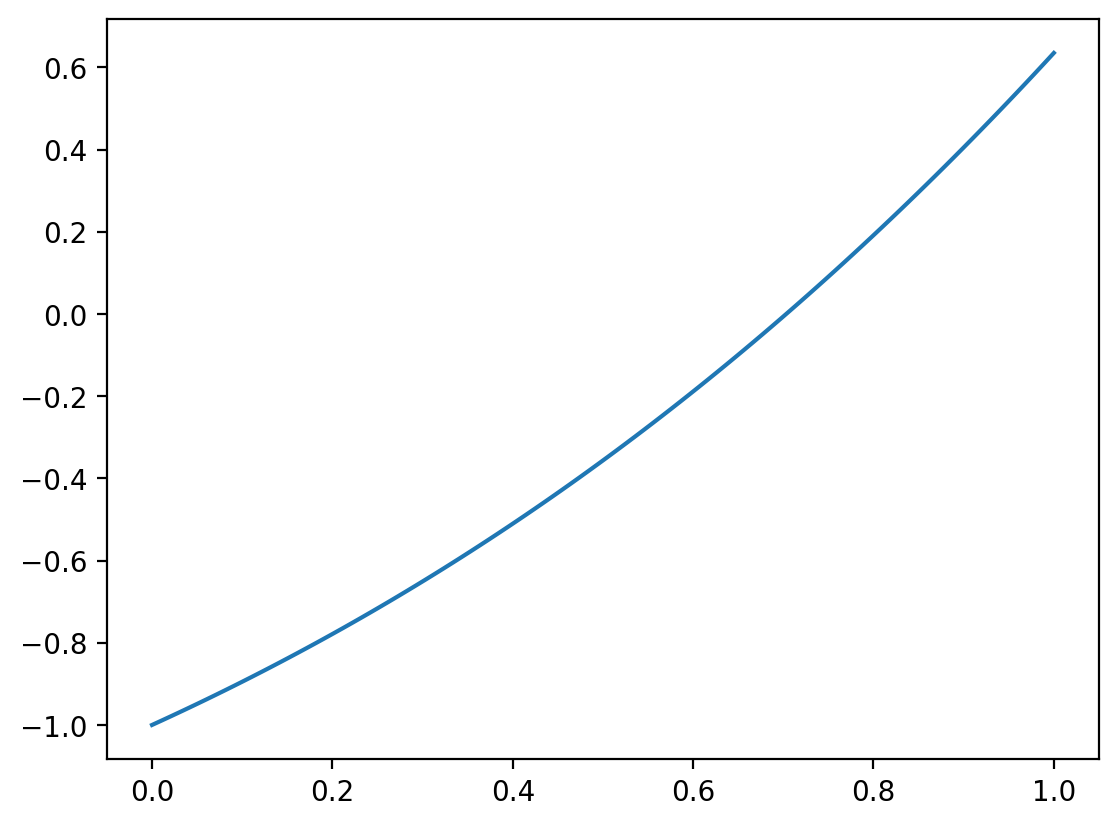

In [6]:
N_x = 100
x = np.linspace(0, 1, N_x)
f = lambda x: np.sinh(x) - np.cos(x)
f_vals = f(x)
plt.plot(x, f_vals);

In [7]:
N_iterations = 50
initial_interval = [0.0, 1.0] # see the plot above!
interval = bisection(initial_interval, f, N_iterations, verbose=True)
print("obtained interval", interval)

iteration 1, residual 0.3564872563966254, root 0.5
iteration 2, residual 0.3564872563966254, root 0.5
iteration 3, residual 0.1444708550486019, root 0.625
iteration 4, residual 0.02988200034679611, root 0.6875
iteration 5, residual 0.02988200034679611, root 0.6875
iteration 6, residual 0.00031546031932716545, root 0.703125
iteration 7, residual 0.00031546031932716545, root 0.703125
iteration 8, residual 0.00031546031932716545, root 0.703125
iteration 9, residual 0.00031546031932716545, root 0.703125
iteration 10, residual 0.00031546031932716545, root 0.703125
iteration 11, residual 0.00031546031932716545, root 0.703125
iteration 12, residual 0.00031546031932716545, root 0.703125
iteration 13, residual 8.300872234334733e-05, root 0.7032470703125
iteration 14, residual 8.300872234334733e-05, root 0.7032470703125
iteration 15, residual 2.489227151980522e-05, root 0.703277587890625
iteration 16, residual 2.489227151980522e-05, root 0.703277587890625
iteration 17, residual 1.036293683542854

# Problem 9

Newton's method:

$$f(x) = 0\\ f(x_0 + \delta) = 0 \\ f(x_0) + f^{'}(x_0)\delta = 0 \\ \delta = -f(x_0) / f^{'}(x_0) \\ x^{(n+1)} = x^{(n)} - f(x^{(n)}) / f^{'}(x^{(n)})$$

In [8]:
def Newton(x0, f, df, N_it, verbose=False):
    x = x0
    solutions = [x0,]
    residuals = [np.abs(f(x0)),]
    for iteration in range(N_it):
        x = x - f(x) / df(x)
        solutions.append(x)
        residuals.append(np.abs(f(x)))
        if verbose:
            print(f"iteration {iteration+1}, residual {residuals[-1]}, solution {solutions[-1]}")
    solutions = np.array(solutions)
    residuals = np.array(residuals)
    return solutions, residuals

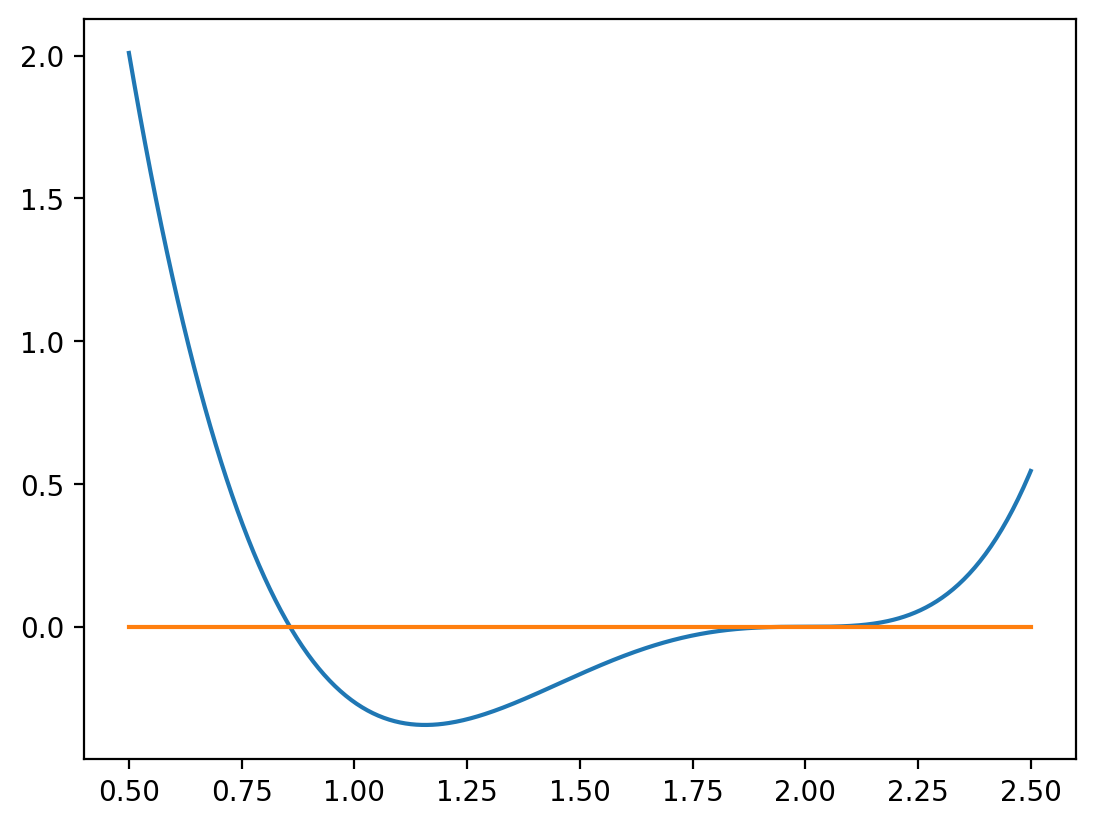

In [9]:
f = lambda x: (14*x-12)*np.exp(x-2) - 7*x**3  + 20*x**2 - 26*x + 12
df = lambda x: (14*x+2)*np.exp(x-2) - 21*x**2 + 40*x - 26

x = np.linspace(0.5, 2.5, 500)
plt.plot(x, f(x))
plt.plot(x, 0*x);

In [10]:
# finding first root

x0 = 0.5
N_it = 20
solutions, residuals = Newton(x0, f, df, N_it, verbose=True)
errors = np.abs(solutions - solutions[-1])[:7]
print("===")
print("errors", errors)
print("errors ratio 1", (errors[1:] / errors[:-1]))
print("errors ratio 2", (errors[1:] / errors[:-1]**2))

iteration 1, residual 0.5136913110145187, solution 0.7174190082085113
iteration 2, residual 0.09269726386540711, solution 0.8250723330481164
iteration 3, residual 0.006035792234204251, solution 0.8549013016553477
iteration 4, residual 3.224093823739338e-05, solution 0.8571308190506197
iteration 5, residual 9.3679730639451e-10, solution 0.8571428567930665
iteration 6, residual 0.0, solution 0.8571428571428571
iteration 7, residual 0.0, solution 0.8571428571428571
iteration 8, residual 0.0, solution 0.8571428571428571
iteration 9, residual 0.0, solution 0.8571428571428571
iteration 10, residual 0.0, solution 0.8571428571428571
iteration 11, residual 0.0, solution 0.8571428571428571
iteration 12, residual 0.0, solution 0.8571428571428571
iteration 13, residual 0.0, solution 0.8571428571428571
iteration 14, residual 0.0, solution 0.8571428571428571
iteration 15, residual 0.0, solution 0.8571428571428571
iteration 16, residual 0.0, solution 0.8571428571428571
iteration 17, residual 0.0, sol

It looks like here convergence is quadratic. The point here is regular, derivative of the function is non-zero, function is analytic, everything is ok. Expect quadratic convergence. Convergence is too fast to observe it numerically, but to some extent we see it.

In [13]:
# finding second root

x0 = 2.5
N_it = 55
solutions, residuals = Newton(x0, f, df, N_it, verbose=True)
errors = np.abs(solutions - solutions[-1])[:50]
print("===")
print("errors", errors)
print("errors ratio 1", (errors[1:] / errors[:-1]))
print("errors ratio 2", (errors[1:] / errors[:-1]**2))

iteration 1, residual 0.17066624458466606, solution 2.354613714442314
iteration 2, residual 0.05282077934462848, solution 2.248133247704592
iteration 3, residual 0.016190663535667227, solution 2.1716144729251288
iteration 4, residual 0.004921478921211531, solution 2.117555546957121
iteration 5, residual 0.001485765708252984, solution 2.0799158469094454
iteration 6, residual 0.0004461506836150875, solution 2.054016034594255
iteration 7, residual 0.00013343610123683902, solution 2.0363564922686757
iteration 8, residual 3.979287362909645e-05, solution 2.024397001685643
iteration 9, residual 1.1842604600076356e-05, solution 2.0163372666795425
iteration 10, residual 3.519424048192832e-06, solution 2.0109243279266127
iteration 11, residual 1.0448955407582616e-06, solution 2.007297638461816
iteration 12, residual 3.100179384318835e-07, solution 2.0048716999919223
iteration 13, residual 9.194049255256687e-08, solution 2.003250751973965
iteration 14, residual 2.725814596260534e-08, solution 2.0

Here convergence is clearly linear. This is in line with theoretical results since based on the graph of the function we see that the derivative is zero at this root.